In [9]:
import pickle
import pandas as pd
data_dict = pickle.load(open('../data/titanic.pkl', 'rb'))
data = []
feature_names = ['index']
first = True
for key in data_dict:
    row = [key]
    for label, val in data_dict[key].items():
        if first:
            feature_names.append(label)
        row.append(val)
    data.append(row)
    first = False
df = pd.DataFrame(data, columns=feature_names)
df.index = df['index']
df.drop(columns=['index'], inplace=True)
df['Sex'] = df['Sex'].apply(lambda strng: 1 if strng == 'male' else 0)

## Benchmark Models

### Logistic Regression

RandomForest accuracy: 0.81
XGBoost accuracy: 0.80
LogisticRegression accuracy: 0.79


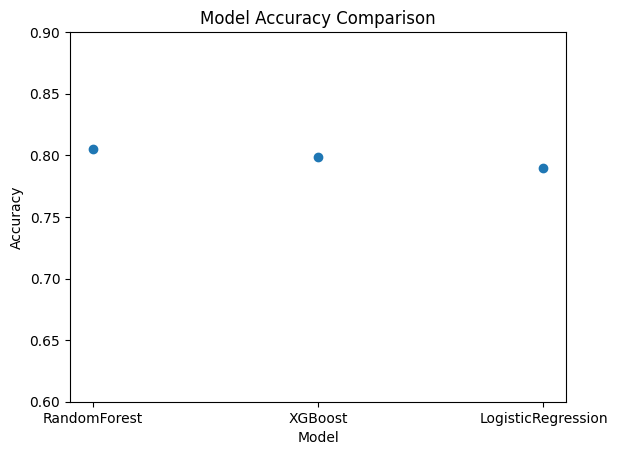

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from matplotlib import pyplot as plt

X = df.drop('Label', axis=1)
y = df['Label']

# Define models
models = [
    ('RandomForest', RandomForestClassifier()),
    ('XGBoost', xgb.XGBClassifier()),
    ('LogisticRegression', LogisticRegression())
]

# Define metric
scoring = make_scorer(accuracy_score)

# Apply 5-fold cross-validation and store results
results = []
for name, model in models:
    cv_score = cross_val_score(model, X, y, cv=5, scoring=scoring).mean()
    results.append((name, cv_score))
    print(f'{name} accuracy: {cv_score:.2f}')

# Plot results
names, scores = zip(*results)  # unzip results into two lists

# plot with dots
plt.plot(names, scores, 'o')
plt.ylim(0.6, 0.9)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()